# Customer Segmentation and Analysis 
### Steps to solve the problem :

1. Importing Libraries.
2. Exploration of data.
3. Data Visualization.
4. Clustering using K-Means.
5. Selection of Clusters.
6. Ploting the Cluster Boundry and Clusters.
7. 3D Plot of Clusters.

# Importing Libraries

In [236]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [237]:
pip install --upgrade threadpoolctl

Note: you may need to restart the kernel to use updated packages.


# Data Exploration

In [238]:
df = pd.read_csv(r'marketing_campaign.csv',sep='\t',header=(0))
df=df.dropna(subset=['Income'])
df=df[df['Income']<600000]
df=df[df['Year_Birth']>1937]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [239]:
df.shape

(2212, 29)

In [240]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.0,2212.0,2212.000000
mean,5585.160940,1968.913653,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,...,5.321429,0.073689,0.074141,0.072785,0.064195,0.013562,0.009042,3.0,11.0,0.150542
std,3247.523735,11.701599,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,...,2.425597,0.261323,0.262060,0.259842,0.245156,0.115691,0.094678,0.0,0.0,0.357683
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5454.500000,1970.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8418.500000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [241]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [242]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Data Visualization

In [243]:
plt.style.use('bmh')

In [244]:
df = pd.read_csv(r'marketing_campaign.csv',sep='\t',header=(0))
df=df.dropna(subset=['Income'])
df=df[df['Income']<600000]
df=df[df['Year_Birth']>1937]
df.head()
df['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2212, dtype: float64

## Histograms

In [245]:
scaler=StandardScaler()
dataset_temp=df[['Year_Birth' , 'MntWines' , 'Income']]

X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')

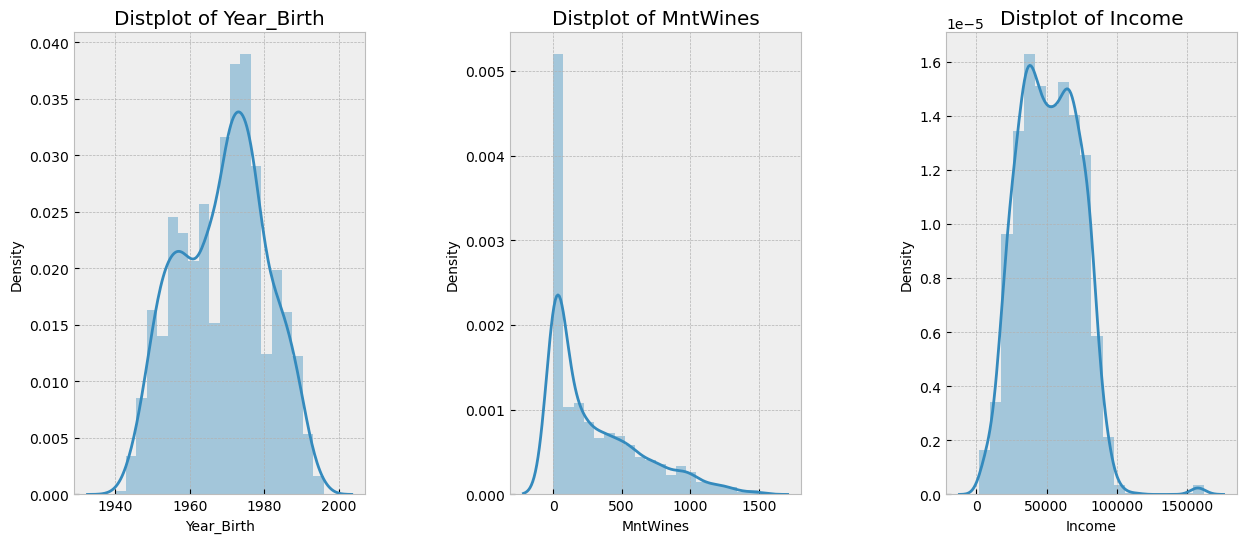

In [246]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Year_Birth' , 'MntWines' , 'Income']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Count Plot of client with kid at home

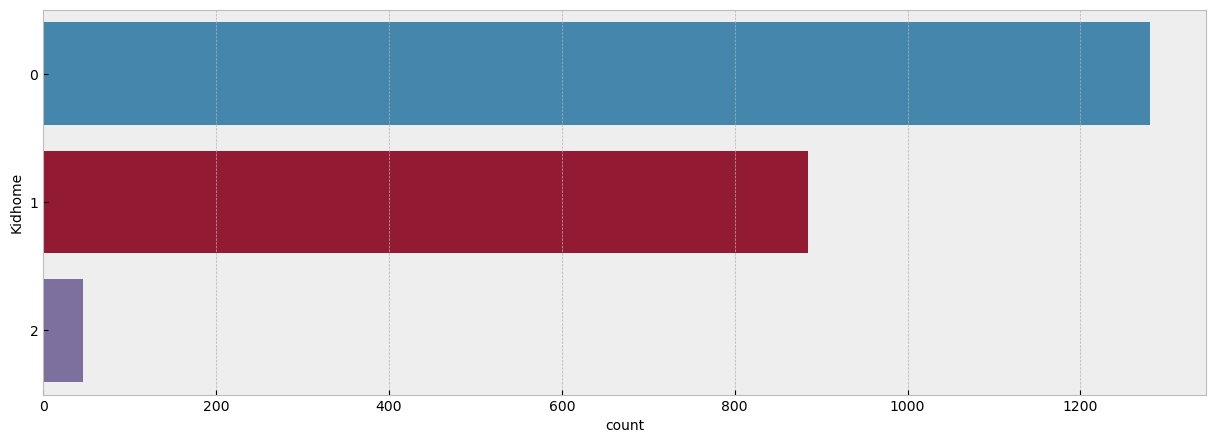

In [247]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Kidhome' , data = df)
plt.show()

## Ploting the Relation between Year of birth, Amount of wine and Annual Income

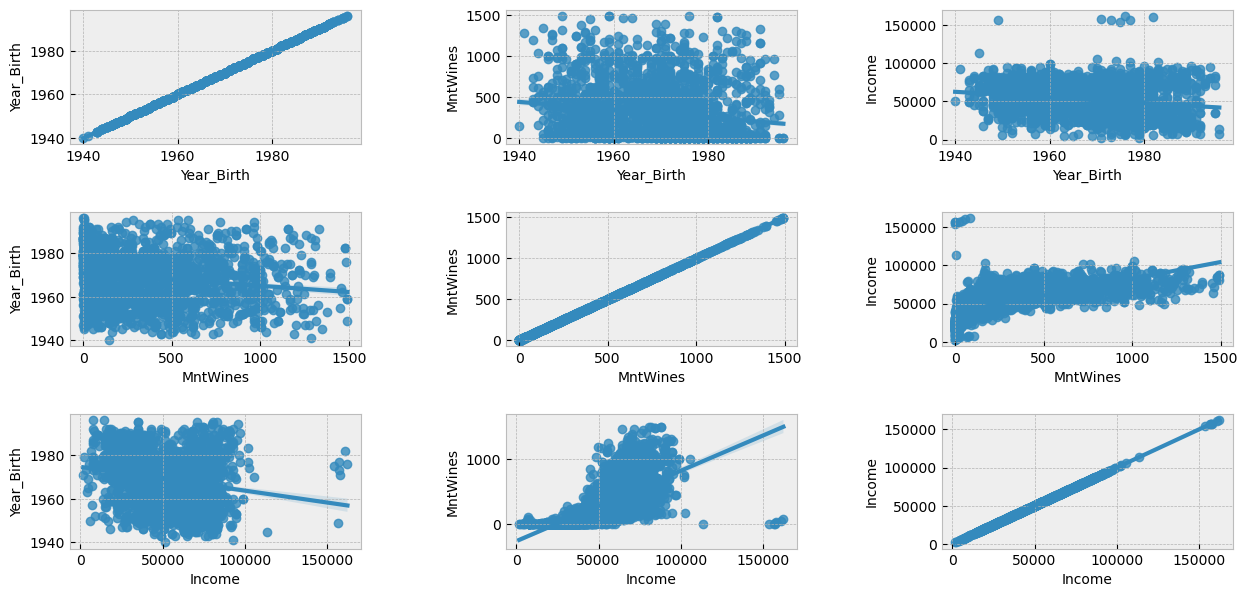

In [248]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Year_Birth' , 'MntWines' , 'Income']:
    for y in ['Year_Birth' , 'MntWines' , 'Income']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

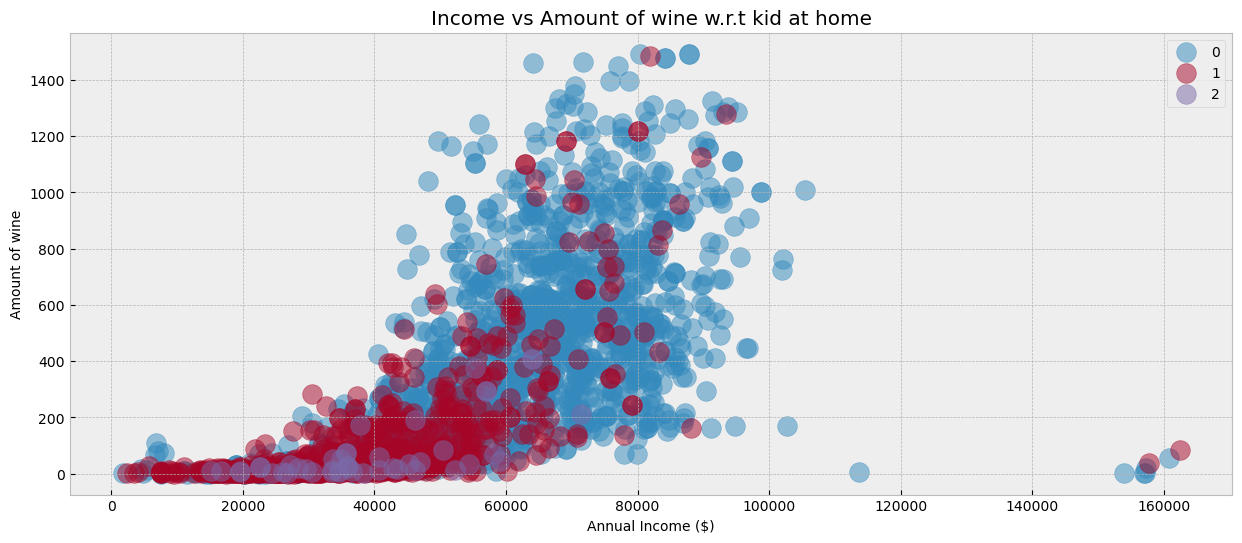

In [249]:
plt.figure(1 , figsize = (15 , 6))
for Status in [0, 1, 2]:
    plt.scatter(x = 'Income' , y = 'MntWines' , data = df[df['Kidhome'] == Status] ,
                s = 200 , alpha = 0.5 , label = Status)
plt.xlabel('Annual Income ($)'), plt.ylabel('Amount of wine')
plt.title('Income vs Amount of wine w.r.t kid at home')
plt.legend()
plt.show()

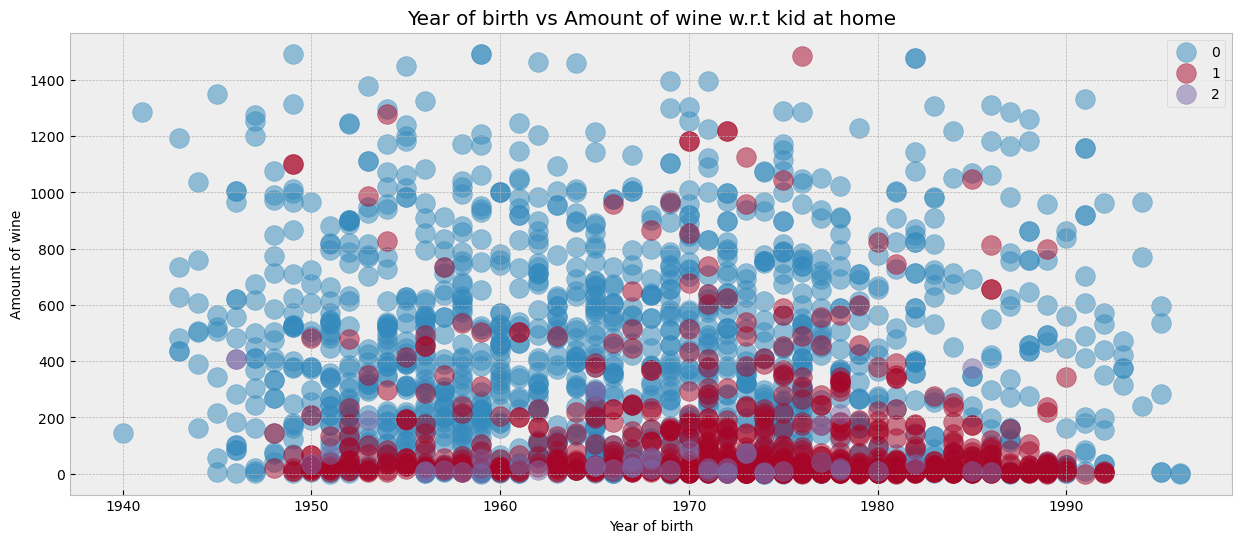

In [250]:
plt.figure(1 , figsize = (15 , 6))
for Status in [0, 1, 2]:
    plt.scatter(x = 'Year_Birth',y = 'MntWines' ,
                data = df[df['Kidhome'] == Status] ,s = 200 , alpha = 0.5 , label = Status)
plt.xlabel('Year of birth'), plt.ylabel('Amount of wine') 
plt.title('Year of birth vs Amount of wine w.r.t kid at home')
plt.legend()
plt.show() 

# Clustering using K- means
### Segmentation using Year of birth and Amount of wine

In [251]:
#Normalization between 0 and 1 to perform k-means
df['Income']=round((df['Income'] - min(df['Income']))/(max(df['Income']) - min(df['Income'])),3)
df['Year_Birth']=round((df['Year_Birth'] - min(df['Year_Birth']))/(max(df['Year_Birth']) - min(df['Year_Birth'])),3)
df['MntWines']=round((df['MntWines'] - min(df['MntWines']))/(max(df['MntWines']) - min(df['MntWines'])),3)

X1 = df[['Year_Birth' , 'MntWines']].iloc[: , :].values

inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### Selecting N Clusters based in Inertia

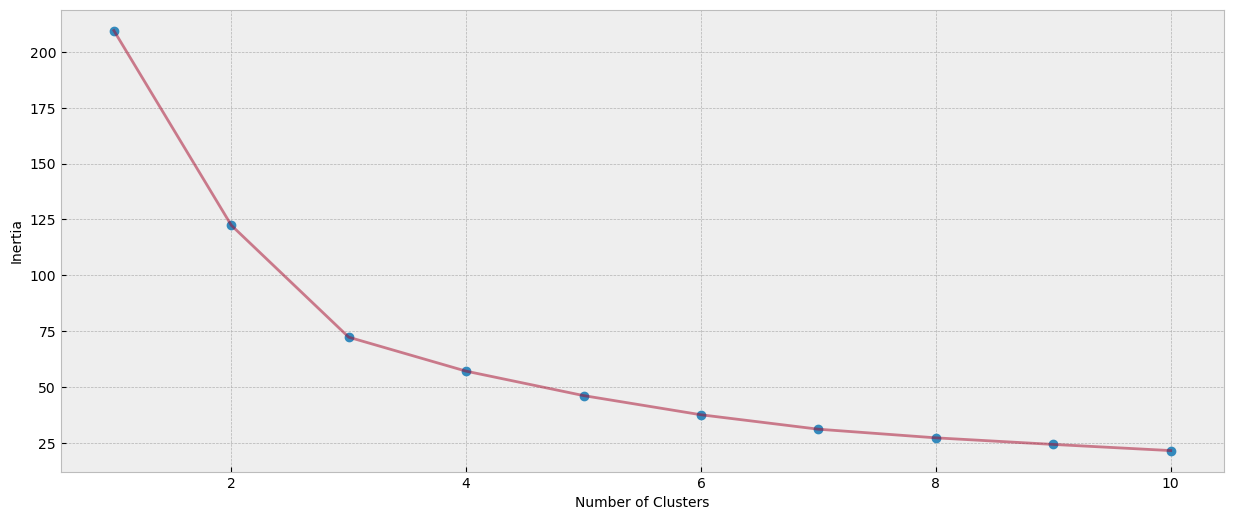

In [252]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [253]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [254]:
h = 0.001
x_min, x_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

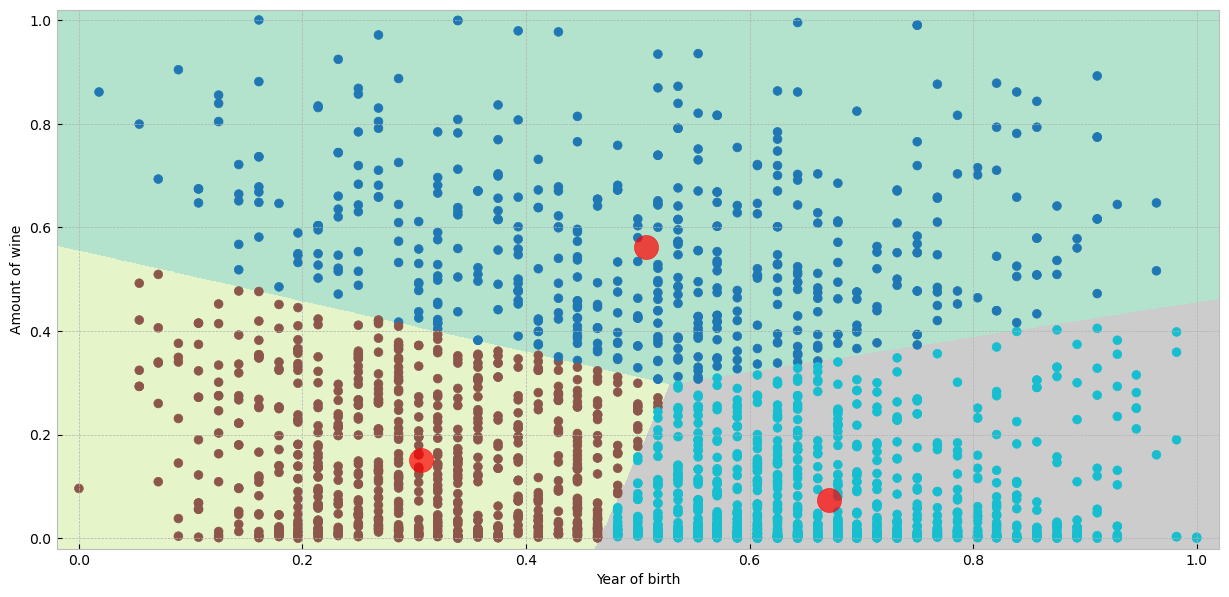

In [255]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Year_Birth' ,y = 'MntWines' , data = df , c = labels1, cmap='tab10', 
            s = 40 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.7)
plt.ylabel('Amount of wine') , plt.xlabel('Year of birth')
plt.xlim(-0.02,1.02)
plt.ylim(-0.02,1.02)
plt.show()

### Segmentation using  Annual Income and Amount of wine consumed

In [256]:
X2 = df[['Income' ,'MntWines']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

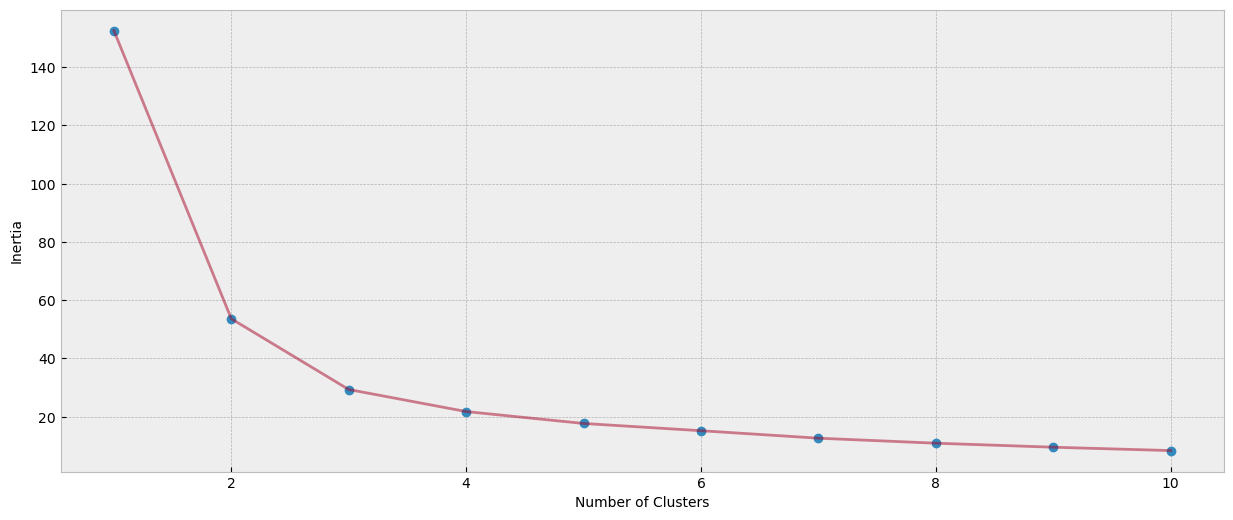

In [257]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [271]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [272]:
h = 0.001
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

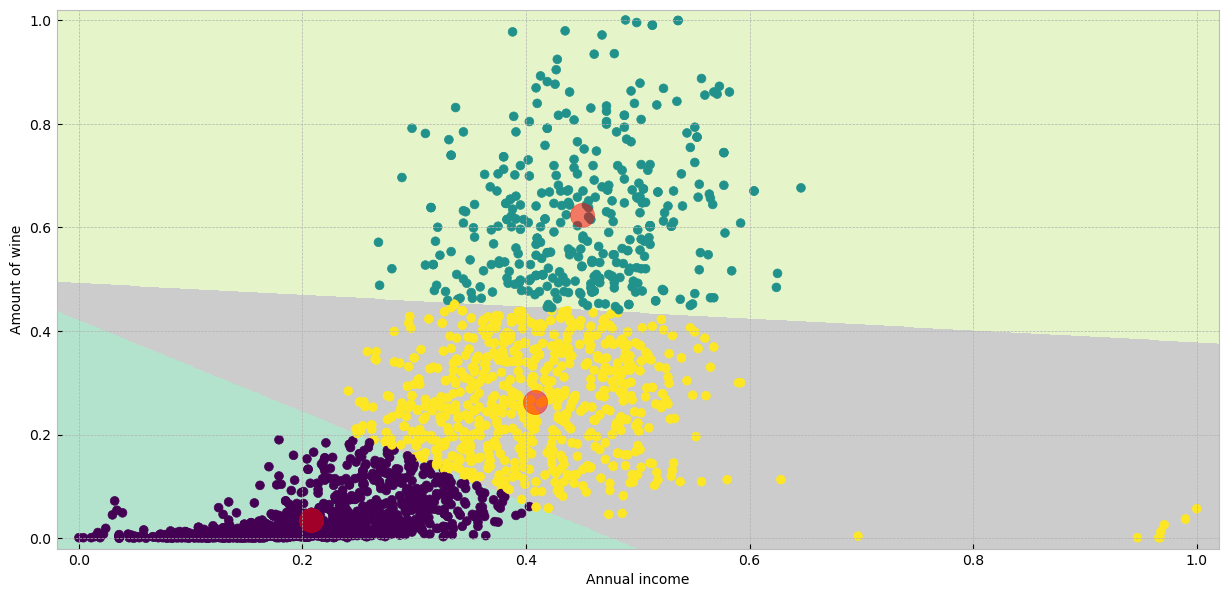

In [278]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Income' ,y = 'MntWines' , data = df , c = labels2 , 
            s = 40 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Amount of wine') , plt.xlabel('Annual income')
plt.xlim(-0.02,1.02)
plt.ylim(-0.02,1.02)
plt.show()

### Segmentation using Year of birth , Annual Income and Amount of wine consumed

In [274]:
X3 = df[['Year_Birth' , 'Income' ,'MntWines']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

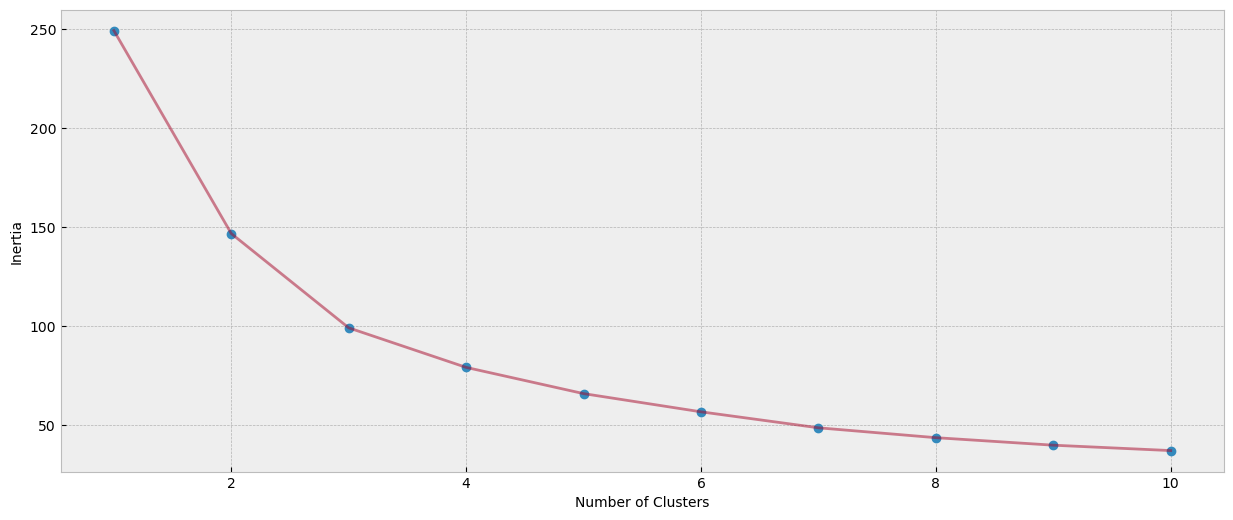

In [275]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [276]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [279]:
df['label3'] =  labels3             
trace1 = go.Scatter3d(
    x= df['Year_Birth'],
    y= df['MntWines'],
    z= df['Income'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 3,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Year of birth'),
            yaxis = dict(title  = 'Amount of wine'),
            zaxis = dict(title  = 'Annual income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)